# Simple ANN model using Pytorch 

In [ ]:
\

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


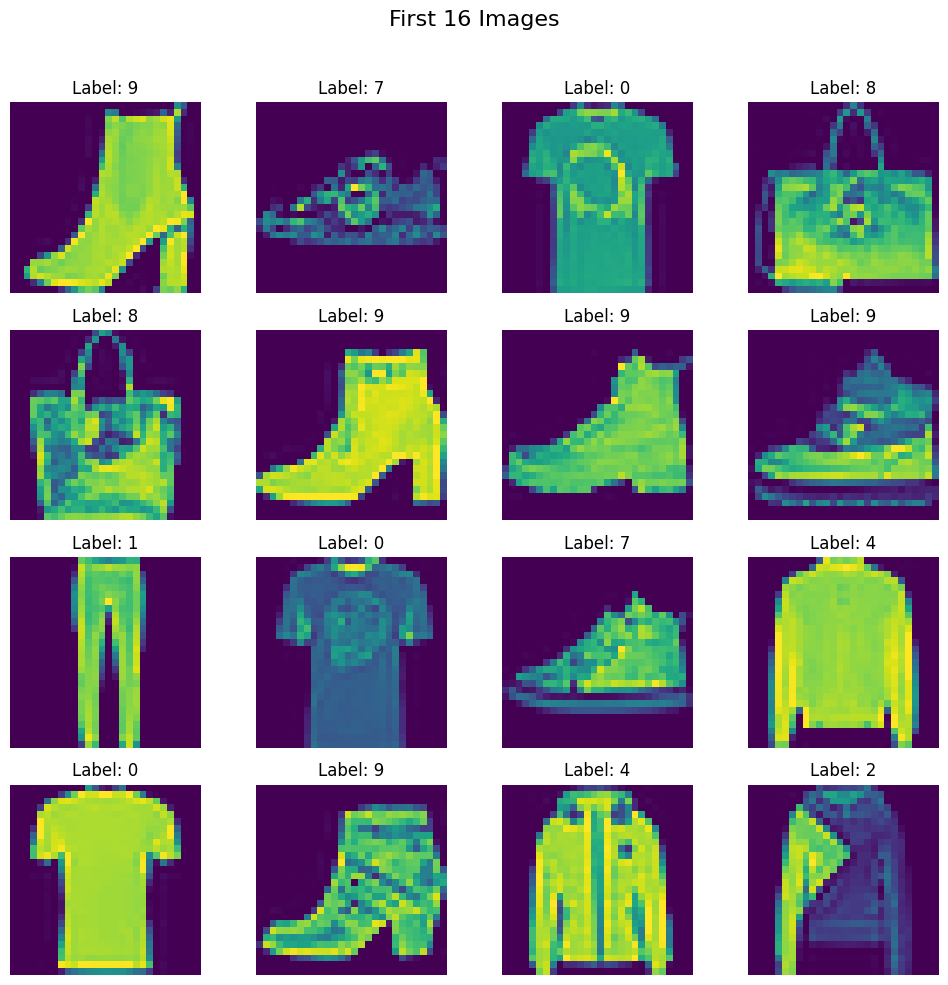

In [4]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [5]:
# train test split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [9]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [10]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [11]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [13]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [40]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [41]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [42]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [43]:
len(train_loader)

150

In [44]:
# training loop

loss_=[]

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  loss_.append(avg_loss)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.3699084281921388
Epoch: 2 , Loss: 0.8027284612258275
Epoch: 3 , Loss: 0.6788219688336055
Epoch: 4 , Loss: 0.6078770729899406
Epoch: 5 , Loss: 0.5462525853514671
Epoch: 6 , Loss: 0.5069960807760556
Epoch: 7 , Loss: 0.489005469083786
Epoch: 8 , Loss: 0.4671978395183881
Epoch: 9 , Loss: 0.4292521058519681
Epoch: 10 , Loss: 0.4077744405468305
Epoch: 11 , Loss: 0.390753798186779
Epoch: 12 , Loss: 0.3734415994087855
Epoch: 13 , Loss: 0.36631507421533266
Epoch: 14 , Loss: 0.347911856174469
Epoch: 15 , Loss: 0.33103870078921316
Epoch: 16 , Loss: 0.33220065196355186
Epoch: 17 , Loss: 0.29938494582970937
Epoch: 18 , Loss: 0.28884885117411613
Epoch: 19 , Loss: 0.28949203312397004
Epoch: 20 , Loss: 0.26530710719525813
Epoch: 21 , Loss: 0.2607759898900986
Epoch: 22 , Loss: 0.2372840283314387
Epoch: 23 , Loss: 0.24663988928000133
Epoch: 24 , Loss: 0.23665492169559002
Epoch: 25 , Loss: 0.22708019070327282
Epoch: 26 , Loss: 0.22715703743199508
Epoch: 27 , Loss: 0.2117187820126613
Ep

In [30]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [31]:
X_test.shape

(1200, 784)

In [32]:
from torchinfo import summary

summary(model, input_size=(X_train.shape[1],784))

Layer (type:depth-idx)                   Output Shape              Param #
MyNN                                     [784, 10]                 --
├─Sequential: 1-1                        [784, 10]                 --
│    └─Linear: 2-1                       [784, 128]                100,480
│    └─ReLU: 2-2                         [784, 128]                --
│    └─Linear: 2-3                       [784, 64]                 8,256
│    └─ReLU: 2-4                         [784, 64]                 --
│    └─Linear: 2-5                       [784, 10]                 650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 85.76
Input size (MB): 2.46
Forward/backward pass size (MB): 1.27
Params size (MB): 0.44
Estimated Total Size (MB): 4.16

In [45]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Accuracy of the Model is - {correct/total*100:.2f} % ")


Accuracy of the Model is - 83.33 % 


# Graph of loss vs Epoch 

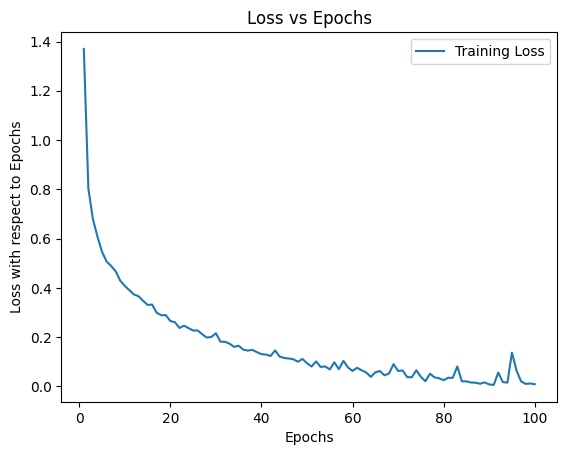

In [46]:

# Graph of loss vs Epoch
x = list(range(1, epochs + 1))
y=loss_
plt.plot(x, y, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss with respect to Epochs")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()
